<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_attack_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
df = pd.read_csv('../dataset/middle.csv')
df.head(3)

,name,age,Contract valid until,Overall rating,Potential,Value,Wage,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,K. De Bruyne,31,2025,91,91,107500000.0,350000.0,94,85,55,93,83,86,89,83,93,90,75,73,76,91,78,92,63,89,74,91,75,65,88,94,83,88,66,66,53,15.0,13.0,5.0,10.0,13.0
1,J. Kimmich,27,2025,89,90,105500000.0,130000.0,91,68,72,87,69,82,85,73,90,85,77,60,84,88,84,78,79,94,68,83,89,85,80,85,50,85,83,85,78,8.0,15.0,7.0,15.0,15.0
2,F. de Jong,25,2026,87,90,104500000.0,230000.0,78,72,72,91,70,87,84,64,89,89,80,83,87,88,79,68,76,89,74,66,74,82,77,88,53,90,76,76,77,7.0,13.0,10.0,10.0,9.0


In [29]:
df.drop(['name', 'age', 'Overall rating', 'Potential', 'Wage', 'Heading accuracy', 'Standing tackle', 'Sliding tackle', 'Contract valid until', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis=1, inplace=True)

In [30]:
# số cell bị null
df.isnull().sum()

Value                  0
Crossing               0
Finishing              0
Short passing          0
Volleys                0
Dribbling              0
Curve                  0
FK Accuracy            0
Long passing           0
Ball control           0
Acceleration           0
Sprint speed           0
Agility                0
Reactions              0
Balance                0
Shot power             0
Jumping                0
Stamina                0
Strength               0
Long shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0
Composure              0
Defensive awareness    0
dtype: int64

In [31]:
# số hàng bị lặp
df.duplicated().sum()

0

In [32]:
# chuẩn hóa dữ liệu
numeric_columns = df.select_dtypes('number').columns
for column in numeric_columns:
  if column == 'Value': continue
  # đưa chỉ số về khoảng 0->1
  df[column] = df[column]/100

  # nên cho xuống dưới sau khi thể hiện correlation thì *2 các cột có correlation cao
  # ==== đối với tiền tạo thì chỉ số dứt điểm quan trọng hơn nên *2 để mô hình dự đoán nhạy cảm hơn với chỉ số nàys ===============
  #if column == 'Finishing': df[column] = df[column]*2

# đưa giá trị cầu thủ về thang đơn vị log
df['Value'] = np.log(df['Value'])

In [33]:
df.describe()

,Value,Crossing,Finishing,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,15.927171,0.679009,0.643130,0.755722,0.589463,0.754519,0.674046,0.595870,0.704713,0.765009,0.733333,0.719213,0.746009,0.731315,0.732611,0.719444,0.655204,0.744528,0.665667,0.670426,0.665222,0.600778,0.695602,0.717454,0.596648,0.723296,0.593028
std,0.990787,0.093479,0.114635,0.059670,0.125777,0.066096,0.112869,0.132439,0.085329,0.054460,0.103280,0.109692,0.093588,0.065199,0.101059,0.089341,0.117678,0.096341,0.111662,0.111474,0.131819,0.181764,0.086833,0.080798,0.111122,0.075617,0.165849
min,14.403297,0.220000,0.190000,0.430000,0.210000,0.390000,0.270000,0.240000,0.310000,0.590000,0.320000,0.330000,0.320000,0.440000,0.320000,0.260000,0.300000,0.320000,0.290000,0.260000,0.250000,0.120000,0.230000,0.410000,0.240000,0.470000,0.170000
25%,15.096444,0.630000,0.580000,0.720000,0.500000,0.720000,0.607500,0.500000,0.650000,0.730000,0.670000,0.660000,0.680000,0.690000,0.680000,0.670000,0.580000,0.690000,0.600000,0.610000,0.580000,0.457500,0.650000,0.670000,0.520000,0.670000,0.460000
50%,15.761421,0.680000,0.670000,0.760000,0.590000,0.760000,0.690000,0.600000,0.710000,0.760000,0.750000,0.730000,0.750000,0.730000,0.740000,0.730000,0.660000,0.760000,0.680000,0.690000,0.690000,0.670000,0.700000,0.720000,0.590000,0.730000,0.650000
75%,16.733281,0.750000,0.720000,0.790000,0.690000,0.800000,0.760000,0.700000,0.760000,0.800000,0.790000,0.790000,0.810000,0.770000,0.800000,0.780000,0.740000,0.810000,0.750000,0.750000,0.760000,0.740000,0.750000,0.770000,0.670000,0.770000,0.720000
max,18.493001,0.940000,0.890000,0.930000,0.880000,0.920000,0.930000,0.940000,0.930000,0.930000,0.960000,0.960000,0.950000,0.930000,0.950000,0.930000,0.930000,0.950000,0.910000,0.910000,0.920000,0.890000,0.940000,0.940000,0.900000,0.940000,0.900000


###Utility function

In [34]:
# thể hiện quan hệ giữa giá trị chuyển nhượng với các thuộc tính khác
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

In [35]:
# vẽ biểu đồ hộp
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

In [36]:
# remove outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    group_df = data.groupby(np.arange(len(data.index))//10, axis=0).mean()
    # gán giá trị bất thường = lower fence hoặc higher fence
    for i in IndexL_Outlier:
      data[column][i] = Lower_fence
      # hoặc gán giá trị bất thường = trung bình của nhóm 10 giá trị liền kề
      # data[column][i] = group_df[column][i//10]
    for i in IndexH_Outlier:
      data[column][i] = Higher_fence
      # hoặc gán giá trị bất thường = trung bình của nhóm 10 giá trị liền kề
      # data[column][i] = group_df[column][i//10]

    print(f'Applied to {len(IndexL_Outlier) + len(IndexH_Outlier)} row(s) of {column} column')

###Next

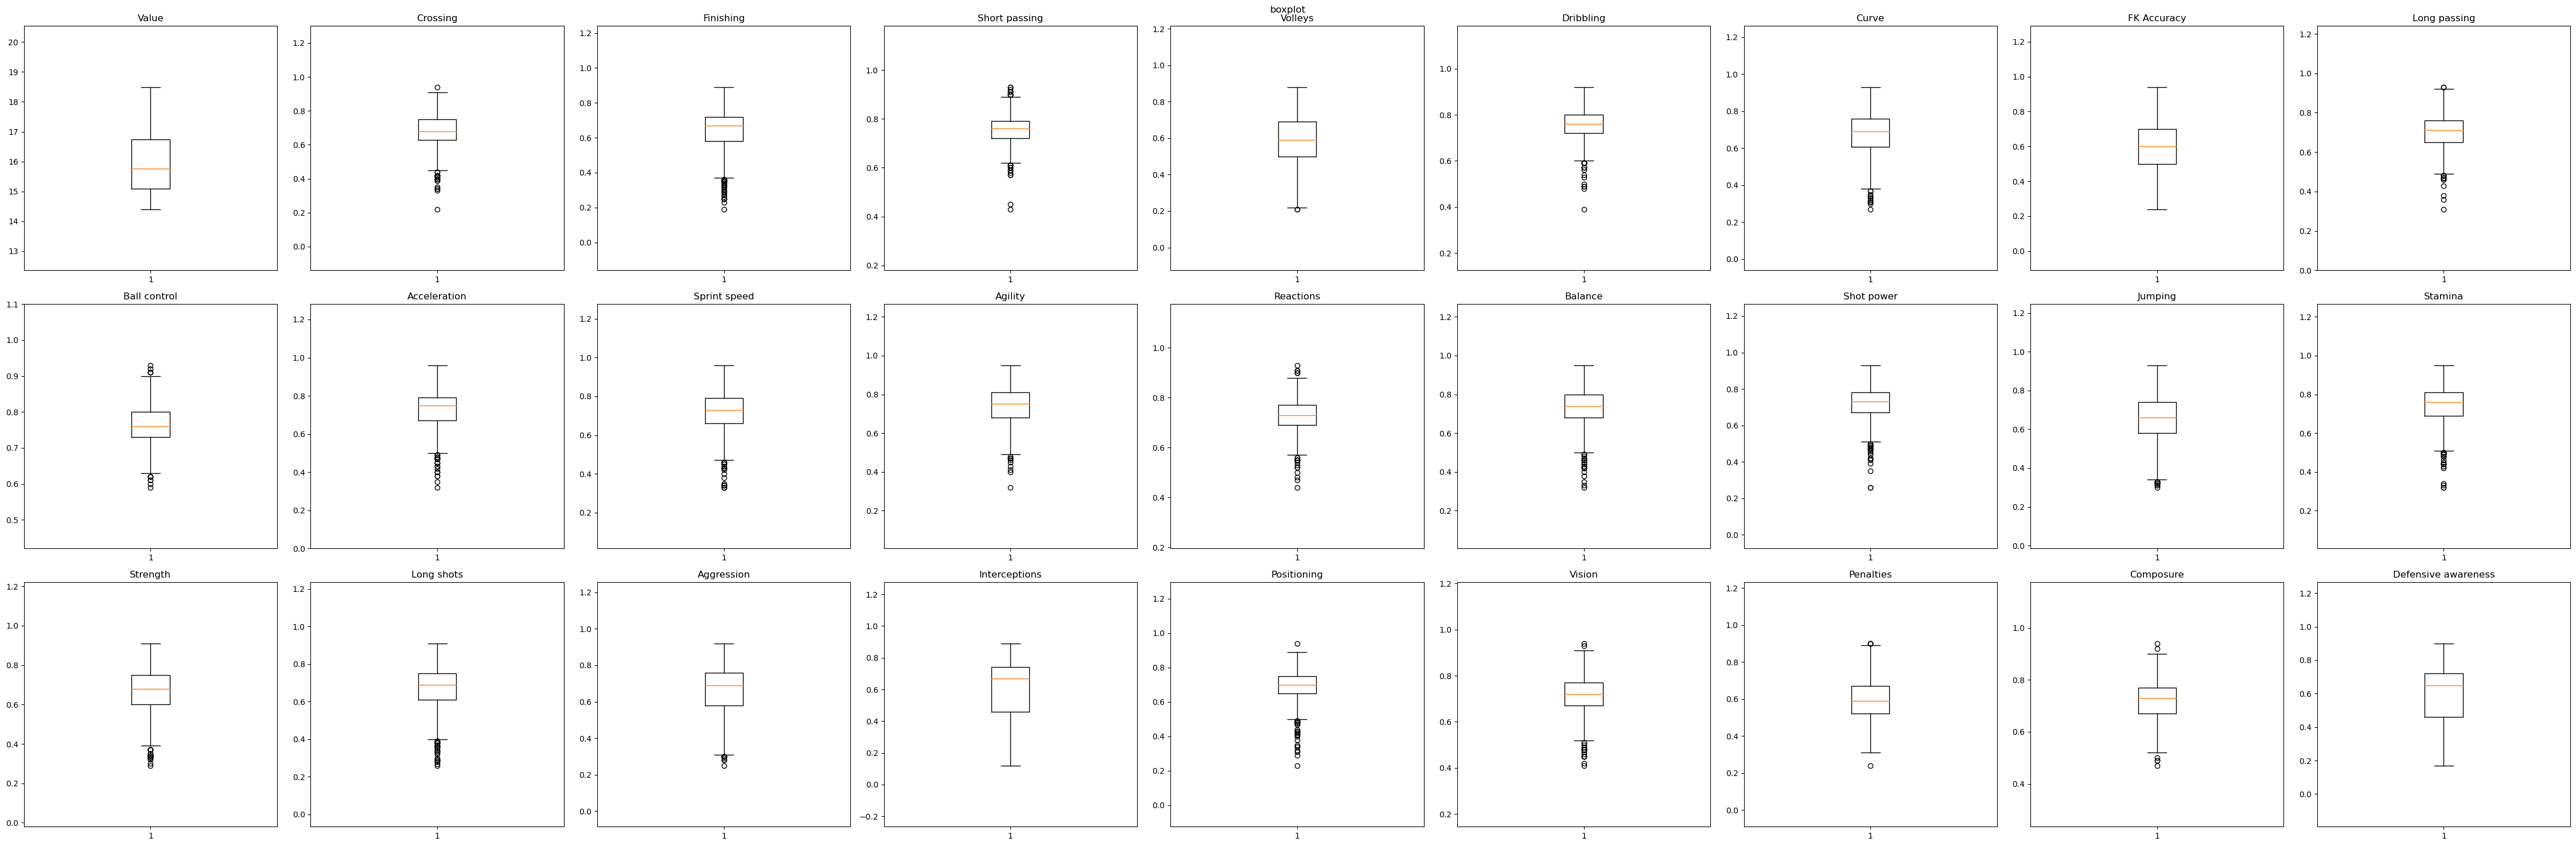

In [37]:
plot_boxplot(numeric_columns, "boxplot", 9)

In [38]:
for column in df.columns:
  outliers(df, column)

Lower fence is = 12.641189073493017
Higher fence is = 19.188536619981875
Applied to 0 row(s) of Value column
Lower fence is = 0.45
Higher fence is = 0.9299999999999999
Applied to 20 row(s) of Crossing column
Lower fence is = 0.36999999999999994
Higher fence is = 0.9299999999999999
Applied to 29 row(s) of Finishing column
Lower fence is = 0.6149999999999999
Higher fence is = 0.8950000000000001
Applied to 25 row(s) of Short passing column
Lower fence is = 0.21500000000000008
Higher fence is = 0.9749999999999999
Applied to 2 row(s) of Volleys column
Lower fence is = 0.5999999999999999
Higher fence is = 0.9200000000000002
Applied to 18 row(s) of Dribbling column
Lower fence is = 0.3787499999999998
Higher fence is = 0.9887500000000001
Applied to 12 row(s) of Curve column
Lower fence is = 0.20000000000000007
Higher fence is = 0.9999999999999999
Applied to 0 row(s) of FK Accuracy column
Lower fence is = 0.48500000000000004
Higher fence is = 0.925
Applied to 16 row(s) of Long passing column
Lo

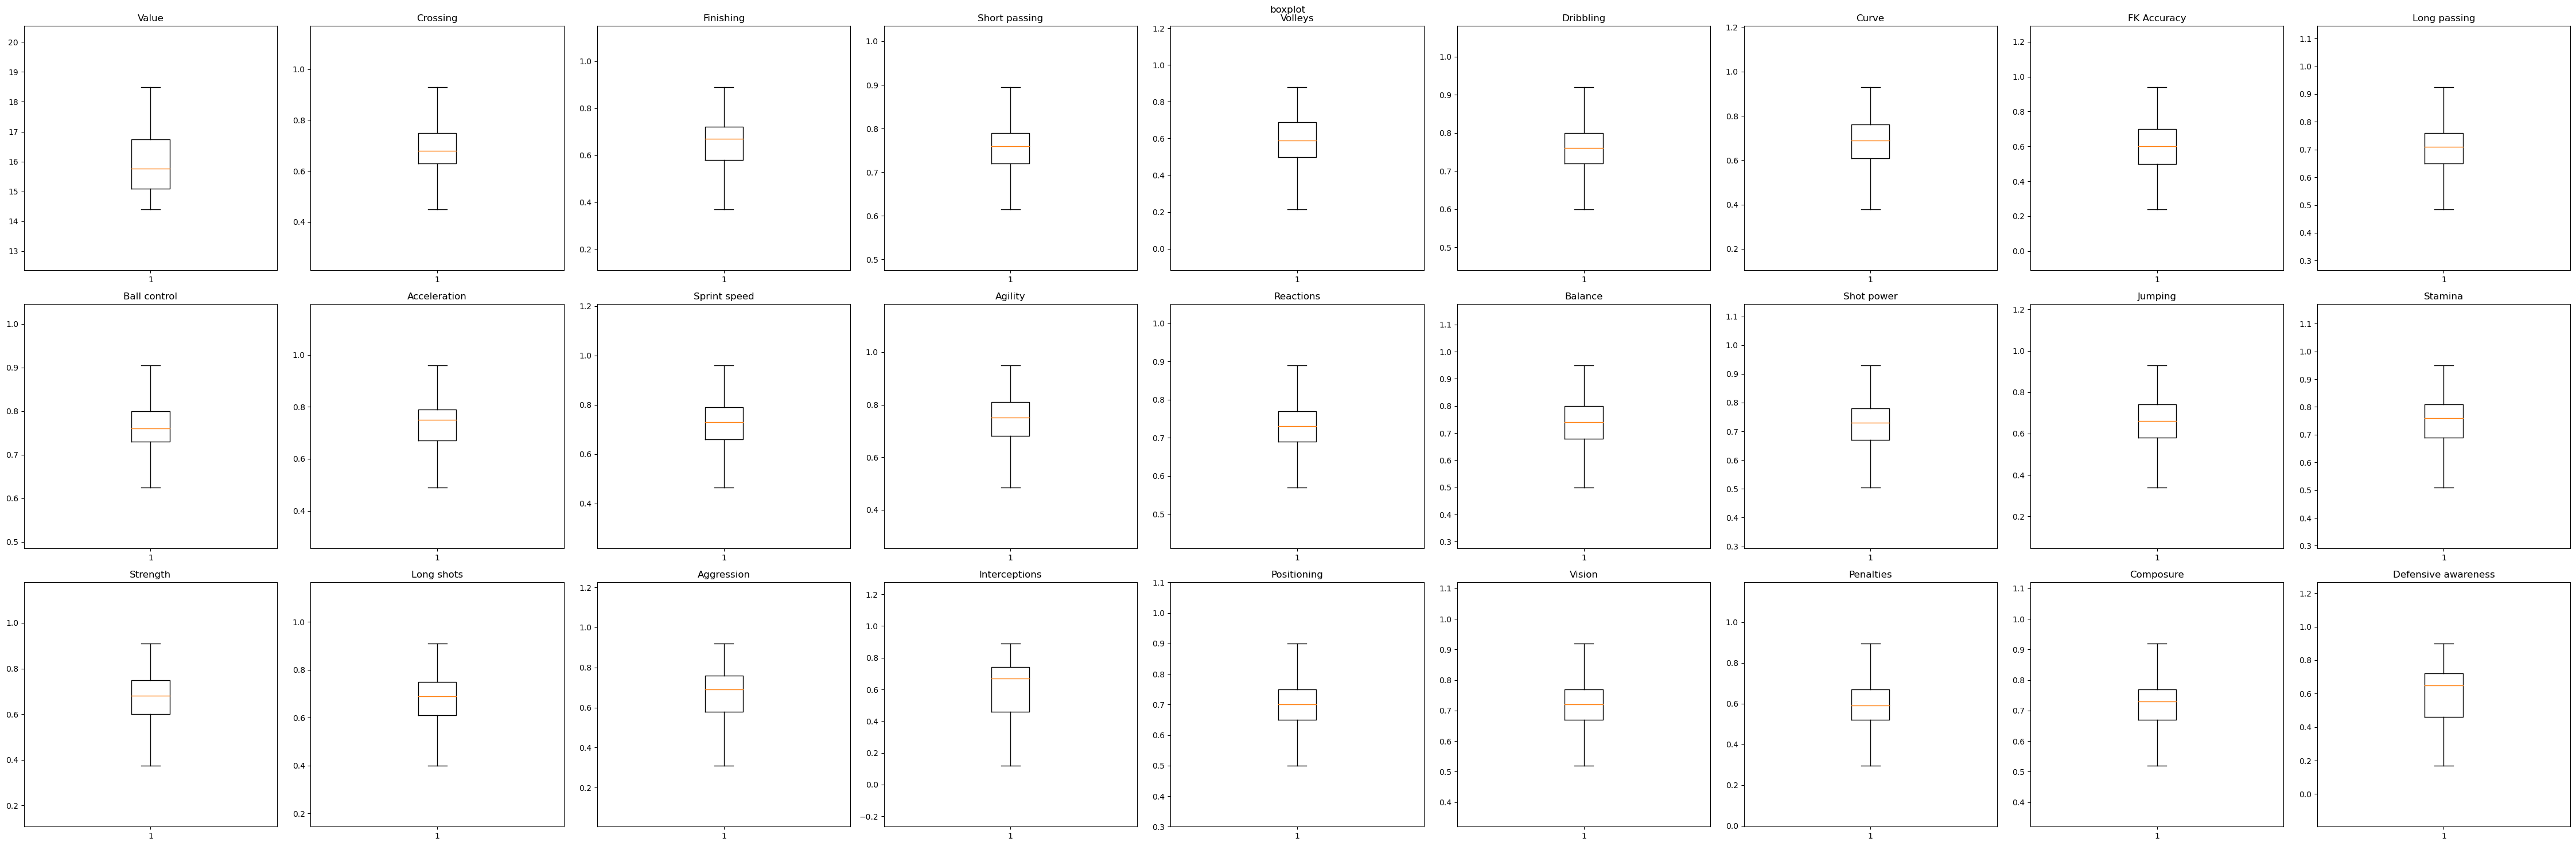

In [39]:
plot_boxplot(numeric_columns, "boxplot", 9)

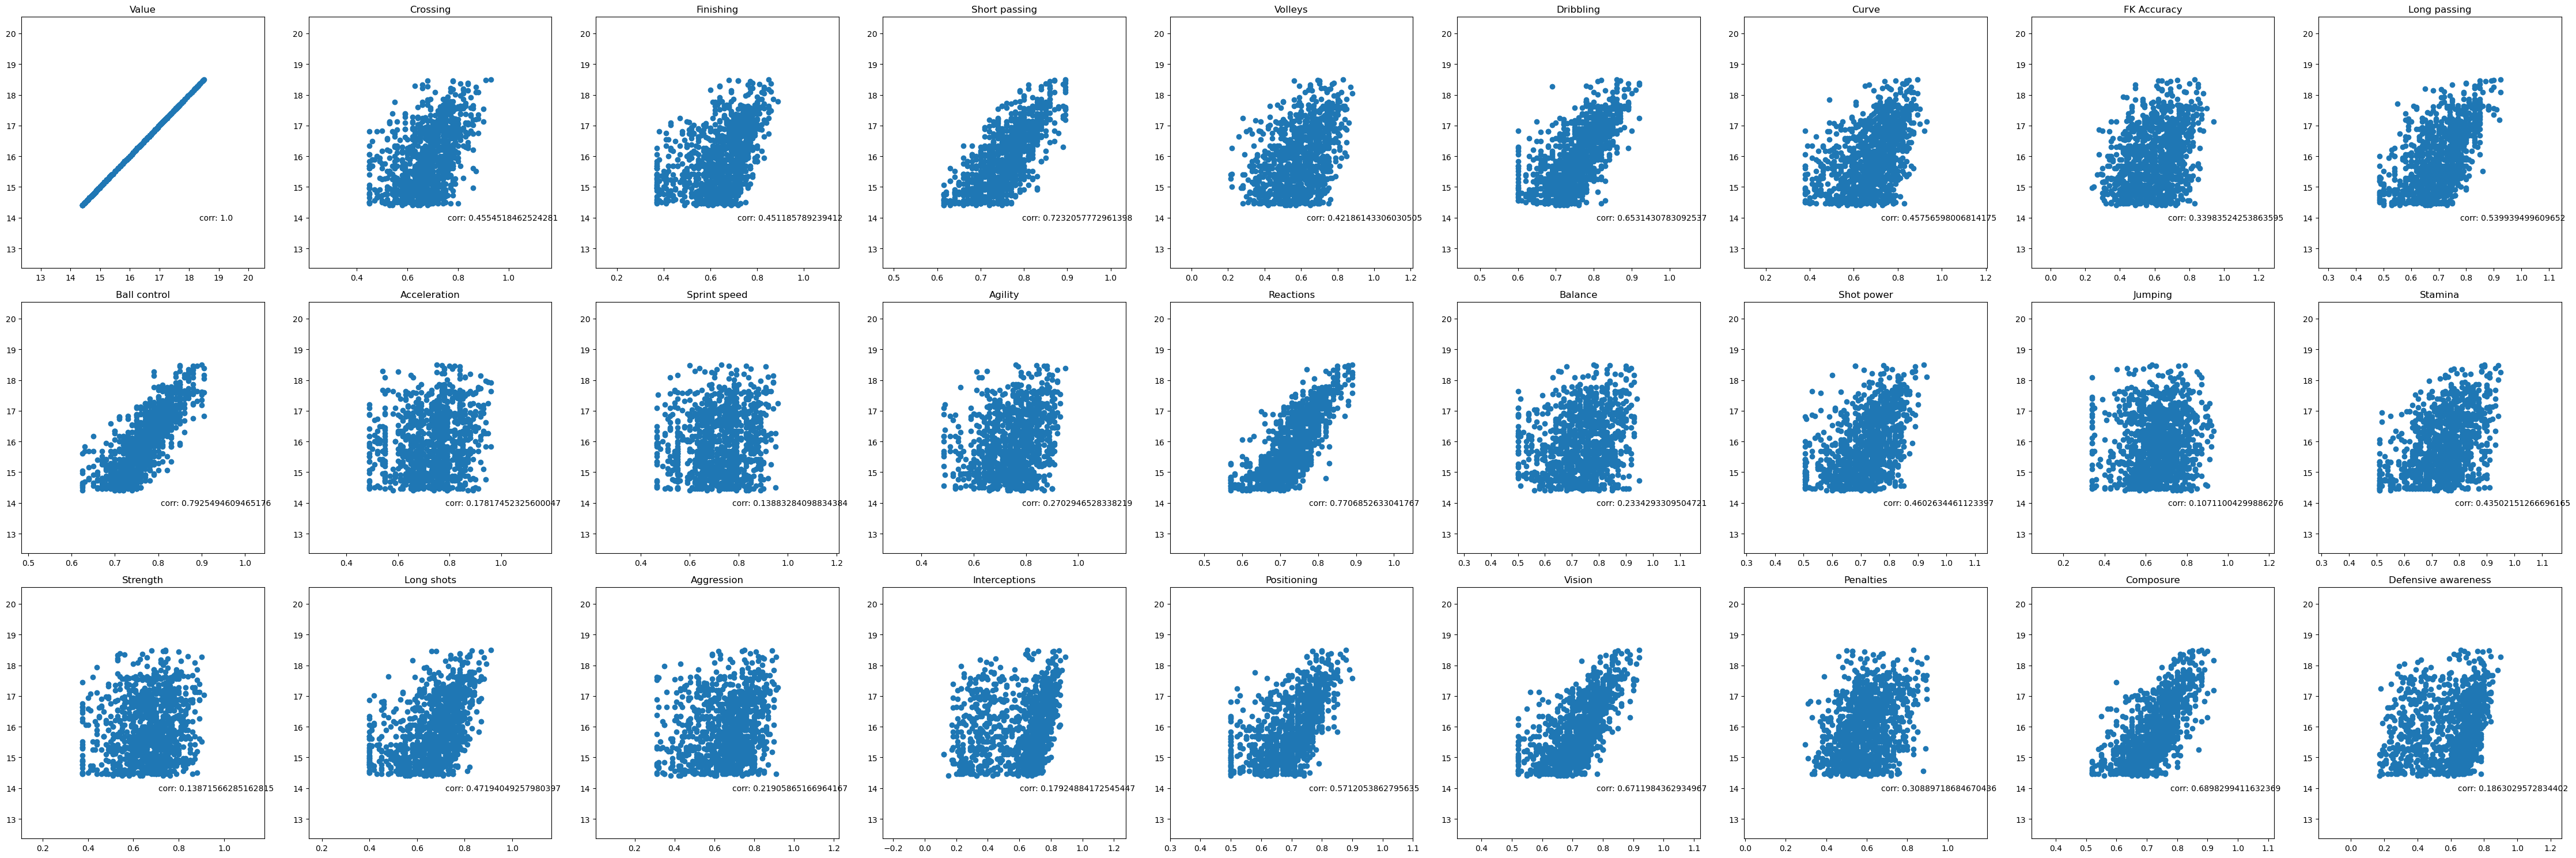

In [40]:
scatterPlotToTarget(numeric_columns, target='Value', ncolumns=9)

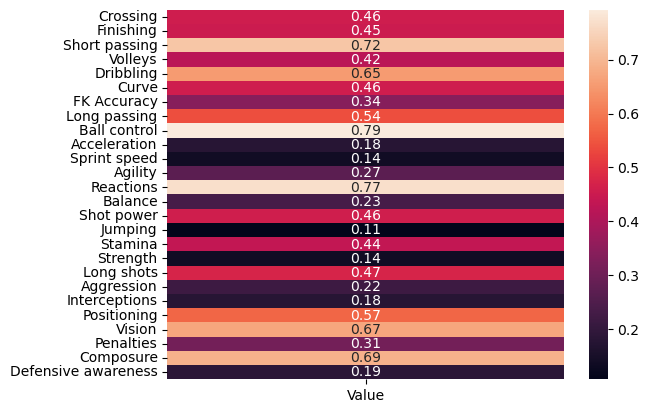

In [41]:
# tính corelation
# 1 là phụ thuộc tuyến tính dương
# 0 là ko phụ thuộc tt
# -1 là phụ thuộc tt âm
correlations = df.corr().drop('Value', axis=0)['Value']
correlations = pd.DataFrame(correlations)
sns.heatmap( correlations, annot=True, yticklabels=True)
plt.show()

In [42]:
# Tính Q3 của tất cả các tương quan với 'value'
q3_corr_value = correlations['Value'].quantile(0.75)

attrWithHighCorr = []
for index, value in correlations['Value'].items():
    if value > q3_corr_value:
        attrWithHighCorr.append(index)

# Hiển thị các thuộc tính được chọn
print("Attributes with high correlation value:", attrWithHighCorr)

Attributes with high correlation value: ['Short passing', 'Dribbling', 'Ball control', 'Reactions', 'Positioning', 'Vision', 'Composure']


In [43]:
# các thuộc tính có correlation với Value cao sẽ được bình phương để dự đoán nhạy hơn với các thuộc tính này
for attr in attrWithHighCorr:
    df[attr] = (df[attr]**2) * 100
df

,Value,Crossing,Finishing,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness
0,18.493001,0.93,0.85,80.1025,0.83,73.96,0.89,0.83,0.925,81.0000,0.75,0.73,0.76,79.21,0.78,0.92,0.63,0.89,0.74,0.91,0.75,0.65,77.44,84.64,0.83,77.44,0.66
1,18.474222,0.91,0.68,75.6900,0.69,67.24,0.85,0.73,0.900,72.2500,0.77,0.60,0.84,77.44,0.84,0.78,0.79,0.94,0.68,0.83,0.89,0.85,64.00,72.25,0.50,72.25,0.83
2,18.464698,0.78,0.72,80.1025,0.70,75.69,0.84,0.64,0.890,79.2100,0.80,0.83,0.87,77.44,0.79,0.68,0.76,0.89,0.74,0.66,0.74,0.82,59.29,77.44,0.53,81.00,0.76
3,18.464698,0.68,0.72,75.6900,0.56,75.69,0.79,0.62,0.850,77.4400,0.82,0.76,0.88,72.25,0.90,0.68,0.65,0.88,0.73,0.68,0.62,0.72,59.29,77.44,0.53,75.69,0.68
4,18.440483,0.78,0.77,73.9600,0.70,65.61,0.74,0.69,0.870,72.2500,0.84,0.91,0.77,75.69,0.68,0.89,0.62,0.89,0.80,0.87,0.81,0.81,64.00,70.56,0.59,70.56,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,14.403297,0.53,0.61,37.8225,0.51,57.76,0.63,0.55,0.560,49.0000,0.89,0.84,0.87,32.49,0.85,0.64,0.82,0.51,0.51,0.63,0.43,0.15,25.00,30.25,0.48,31.36,0.17
1076,14.403297,0.68,0.59,47.6100,0.54,49.00,0.69,0.61,0.670,39.0625,0.79,0.79,0.79,37.21,0.80,0.58,0.75,0.55,0.58,0.57,0.60,0.59,39.69,43.56,0.62,44.89,0.58
1077,14.403297,0.64,0.54,43.5600,0.42,49.00,0.57,0.38,0.660,49.0000,0.87,0.89,0.66,44.89,0.56,0.70,0.73,0.77,0.76,0.56,0.74,0.65,38.44,34.81,0.42,42.25,0.62
1078,14.403297,0.62,0.72,51.8400,0.65,53.29,0.73,0.66,0.650,54.7600,0.74,0.72,0.74,36.00,0.74,0.75,0.77,0.71,0.73,0.66,0.38,0.33,54.76,49.00,0.72,53.29,0.17


In [44]:
from sklearn.model_selection import train_test_split

y = df['Value']
X = df.drop(['Value'], axis=1)

# tỉ lệ 20% là dữ liệu để test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

models = {
    'linear_regression': LinearRegression(),
    'decision_tree': DecisionTreeRegressor(min_samples_split=math.ceil(len(y_train)/200)),
    'random_forest': RandomForestRegressor(100, min_samples_split=math.ceil(len(y_train)/200))
}
reg_linear_models = {
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
}

for (model_name, model) in models.items():
    # chia tập train thành 5 tập nhỏ và tạo ra 5 model được train trên từng tập nhỏ
  cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
  # test 5 model trên tập test
  y_pred = [estimator.predict(X_test) for estimator in cv_results['estimator']]
  # lấy trung bình
  y_pred = np.average(y_pred, axis=0)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  # gần 1 là tốt
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.34636013710353836
RMSE:  0.4406413650311494
r2 score:  0.8124209855340857

decision_tree
MAE:  0.37407617143363725
RMSE:  0.46593168993390716
r2 score:  0.7902711279877145

random_forest
MAE:  0.3270267911780676
RMSE:  0.4135027140176262
r2 score:  0.8348150597337881



In [46]:
from sklearn.model_selection import GridSearchCV

# thử hằng số phạt
param_grid = {
    'ridge_regression': {'alpha': np.arange(0.1, 0.2, 0.01)},
    'lasso_regression': {'alpha': np.arange(0.0001, 0.001, 0.0001)}
}

for (model_name, model) in reg_linear_models.items():
  # tìm alpha cho mô hình tốt nhất bằng cách thử các alpha với phương pháp cross-validate
  grid_search = GridSearchCV(model, param_grid[model_name], scoring='r2')
  grid_search.fit(X_train, y_train)
  # chọn alpha tốt nhất
  reg_linear_models[model_name] = grid_search.best_estimator_
  # huấn luyện lại trên toàn bộ tập train để tìm ra tham số của hàm tuyến tính
  reg_linear_models[model_name].fit(X_train, y_train)
  y_pred = reg_linear_models[model_name].predict(X_test)
  print(reg_linear_models[model_name])
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

Ridge(alpha=0.18999999999999995)
MAE:  0.345992164073586
RMSE:  0.4402622298991771
r2 score:  0.8127436388507364

Lasso(alpha=0.0007000000000000001)
MAE:  0.3493353442920415
RMSE:  0.44455354105263056
r2 score:  0.8090754086496321



In [47]:
models['random_forest'].fit(X_train, y_train)
y_pred = models['random_forest'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,16.166886,16.333448
1,15.761421,15.280347
2,15.297115,14.889431
3,15.687313,15.081508
4,14.457364,14.882475
...,...,...
211,14.978661,14.810969
212,14.845130,15.090564
213,15.250595,14.990148
214,16.213406,16.628048


Text(0.5, 1.0, 'Áp dụng mô hình rừng ngẫu nhiên cho tiền vệ')

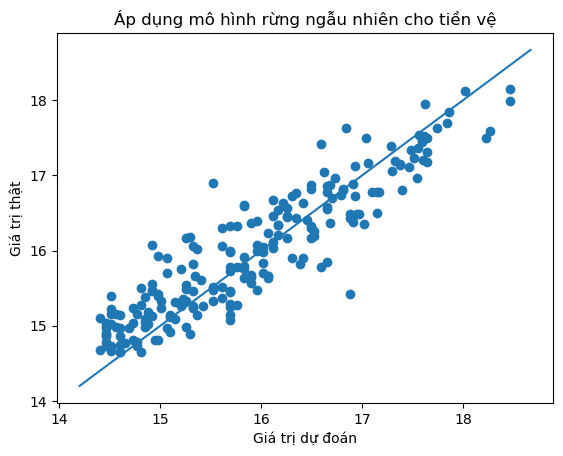

In [48]:
# các điểm nằm dưới đường chéo cho thấy y_test > y_pred và ngược lại
plt.scatter(y_test, y_pred)
plt.plot(plt.xlim(), plt.xlim())
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thật')
plt.title('Áp dụng mô hình rừng ngẫu nhiên cho tiền vệ')

In [49]:
percent_loss = np.sum(abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 1./len(y_test)
percent_loss

0.37888812317494724

Text(0.5, 1.0, 'So sánh giá trị dự đoán và giá trị thật của tiền vệ theo hàm mũ')

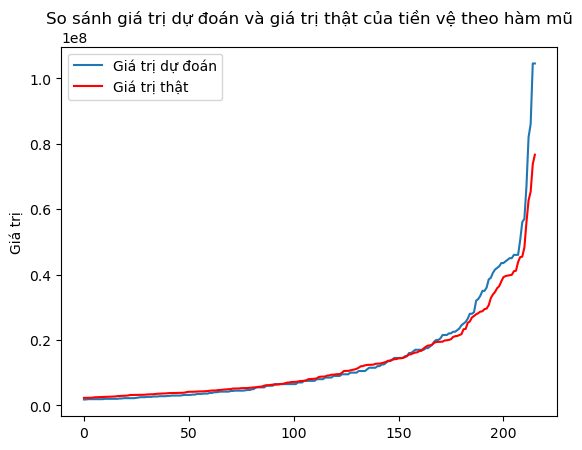

In [50]:
y_test = list(y_test)
y_test.sort()
y_pred.sort()
plt.plot(range(len(y_test)), np.exp(y_test), label='Giá trị dự đoán')
plt.plot(range(len(y_test)), np.exp(y_pred), color='#ff0000', label='Giá trị thật')
plt.legend()
plt.ylabel('Giá trị')
plt.title('So sánh giá trị dự đoán và giá trị thật của tiền vệ theo hàm mũ')